## Transfer Learning Resnet50

Please download the dataset from the below url

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [46]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/MixOrg_Data/Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/MixOrg_Data/Test'


In [47]:
# Import the Resnet50 library as shown below and add preprocessing layer to the front of Resnet 50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [48]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [49]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [50]:
  # useful for getting number of output classes
import os
folders = os.listdir('/content/drive/MyDrive/Colab Notebooks/MixOrg_Data/Train')

In [51]:
folders.sort()
folders

['Mahindra Marazzo',
 'Maruti Ciaz',
 'Maruti Ertiga',
 'Tata Tigor',
 'audi a4',
 'bmw 320',
 'chevrolet Uva Sail',
 'chevrolet tavera',
 'force',
 'ford ecosport',
 'ford fiesta',
 'ford figo',
 'honda amaze',
 'honda brv',
 'honda city',
 'honda city zx',
 'honda civic',
 'honda jazz',
 'honda mobilio',
 'honda wrv',
 'hyundai ACCENT',
 'hyundai creta',
 'hyundai eon',
 'hyundai i10',
 'hyundai i20',
 'hyundai santro',
 'hyundai verna',
 'hyundai xcent',
 'kia Carnival',
 'mahindra bolero',
 'mahindra imperio',
 'mahindra scorpio',
 'mahindra tuv300',
 'mahindra xuv500',
 'maruti 800',
 'maruti Celario',
 'maruti alto',
 'maruti baleno',
 'maruti brezza',
 'maruti eeco',
 'maruti ignis',
 'maruti omni',
 'maruti ritz',
 'maruti scross',
 'maruti swift',
 'maruti swift dzire',
 'maruti wagon r',
 'maruti xl6',
 'maruti xx4',
 'maruti zen',
 'maruti zen estilo',
 'nissan kicks',
 'nissan terrano',
 'renault duster',
 'renault kwid',
 'skoda rapid',
 'tata hexa',
 'tata indigo',
 'tata

In [52]:
# Number of output classes
len(folders)

71

### Distribution of classes

In [101]:
class_dict = {}
count = 0
for i in glob('/content/drive/MyDrive/Colab Notebooks/MixOrg_Data/Train/*'):
  class_dict[count]=len(glob(i+"/*"))
  count+=1

In [102]:
print(class_dict)

{0: 1, 1: 13, 2: 6, 3: 6, 4: 9, 5: 1, 6: 1, 7: 23, 8: 3, 9: 65, 10: 33, 11: 19, 12: 39, 13: 6, 14: 100, 15: 6, 16: 4, 17: 1, 18: 1, 19: 5, 20: 2, 21: 25, 22: 8, 23: 125, 24: 56, 25: 1, 26: 5, 27: 1, 28: 1, 29: 1, 30: 6, 31: 160, 32: 2, 33: 14, 34: 16, 35: 6, 36: 22, 37: 1, 38: 27, 39: 14, 40: 56, 41: 22, 42: 1, 43: 3, 44: 39, 45: 1, 46: 3, 47: 1, 48: 12, 49: 25, 50: 2, 51: 5, 52: 9, 53: 1, 54: 43, 55: 2, 56: 3, 57: 9, 58: 1, 59: 14, 60: 2, 61: 1, 62: 12, 63: 1, 64: 5, 65: 3, 66: 8, 67: 7, 68: 1, 69: 26, 70: 11}


<BarContainer object of 71 artists>

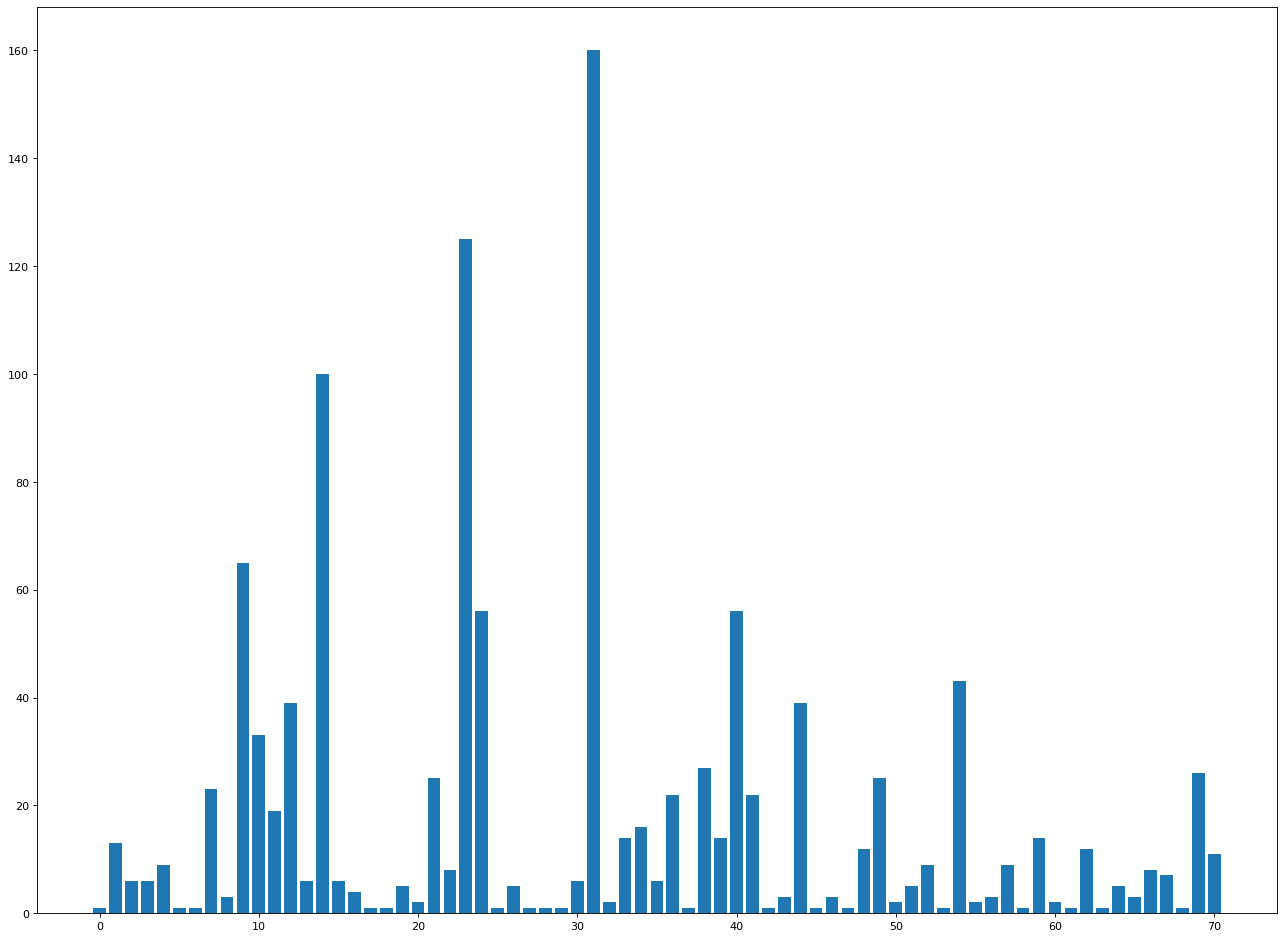

In [105]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
plt.bar(list(class_dict.keys()), list(class_dict.values()))

In [53]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [54]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [55]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [59]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [60]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [61]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/MixOrg_Data/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1164 images belonging to 71 classes.


In [63]:
dic_train = training_set.class_indices
dic_train

{'Mahindra Marazzo': 0,
 'Maruti Ciaz': 1,
 'Maruti Ertiga': 2,
 'Tata Tigor': 3,
 'audi a4': 4,
 'bmw 320': 5,
 'chevrolet Uva Sail': 6,
 'chevrolet tavera': 7,
 'force': 8,
 'ford ecosport': 9,
 'ford fiesta': 10,
 'ford figo': 11,
 'honda amaze': 12,
 'honda brv': 13,
 'honda city': 14,
 'honda city zx': 15,
 'honda civic': 16,
 'honda jazz': 17,
 'honda mobilio': 18,
 'honda wrv': 19,
 'hyundai ACCENT': 20,
 'hyundai creta': 21,
 'hyundai eon': 22,
 'hyundai i10': 23,
 'hyundai i20': 24,
 'hyundai santro': 25,
 'hyundai verna': 26,
 'hyundai xcent': 27,
 'kia Carnival': 28,
 'mahindra bolero': 29,
 'mahindra imperio': 30,
 'mahindra scorpio': 31,
 'mahindra tuv300': 32,
 'mahindra xuv500': 33,
 'maruti 800': 34,
 'maruti Celario': 35,
 'maruti alto': 36,
 'maruti baleno': 37,
 'maruti brezza': 38,
 'maruti eeco': 39,
 'maruti ignis': 40,
 'maruti omni': 41,
 'maruti ritz': 42,
 'maruti scross': 43,
 'maruti swift': 44,
 'maruti swift dzire': 45,
 'maruti wagon r': 46,
 'maruti xl6'

In [62]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/MixOrg_Data/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 231 images belonging to 71 classes.


In [64]:
test_set.classes

array([ 0,  1,  1,  1,  2,  2,  3,  4,  5,  6,  7,  8,  9,  9,  9, 10, 11,
       12, 12, 12, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 16, 17, 18,
       19, 19, 19, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25,
       25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 28, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 30, 31, 31, 31, 32, 33, 33, 33, 33, 34, 35, 35, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38,
       38, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 41, 41, 42, 42, 43, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45,
       45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 46, 46, 47, 48, 49, 50, 51, 52, 52, 53, 53, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 64, 64, 64, 64, 64, 65, 65, 66, 66, 66,
       67, 67, 67, 67, 67

In [65]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
37/37 [==============================] - 326s 9s/step - loss: 19.3515 - accuracy: 0.0608 - val_loss: 15.0393 - val_accuracy: 0.1429
Epoch 2/50
37/37 [==============================] - 18s 484ms/step - loss: 8.8139 - accuracy: 0.1797 - val_loss: 8.5938 - val_accuracy: 0.2208
Epoch 3/50
37/37 [==============================] - 18s 481ms/step - loss: 6.5244 - accuracy: 0.2082 - val_loss: 7.7824 - val_accuracy: 0.3030
Epoch 4/50
37/37 [==============================] - 18s 480ms/step - loss: 5.1697 - accuracy: 0.2598 - val_loss: 7.5703 - val_accuracy: 0.3463
Epoch 5/50
37/37 [==============================] - 18s 478ms/step - loss: 5.2872 - accuracy: 0.2906 - val_loss: 7.2394 - val_accuracy: 0.2771
Epoch 6/50
37/37 [==============================] - 18s 482ms/step - loss: 4.9995 - accuracy: 0.2794 - val_loss: 5.3829 - val_accuracy: 0.3723
Epoch 7/50
37/37 [==============================] - 18s 480ms/step - loss: 3.9147 - accuracy: 0.3488 - val_loss: 5.4239 - val_accuracy: 0.4286

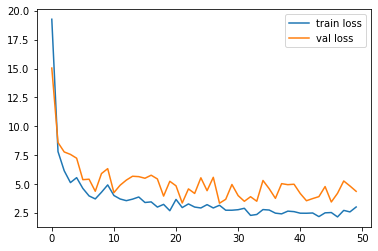

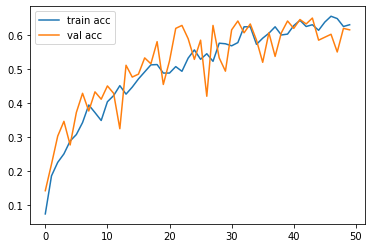

<Figure size 432x288 with 0 Axes>

In [66]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [67]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [68]:
y_pred = model.predict(test_set)

In [70]:
y_pred.shape

(231, 71)

In [71]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [72]:
y_pred

array([27, 38, 18, 46, 31, 15,  4, 45, 46,  9, 24, 25, 23, 31, 46, 25,  2,
       27, 51,  9, 23, 23, 24, 37, 23, 38, 51, 64, 26, 29, 23, 44, 45, 43,
       65, 23, 47, 16, 46, 30, 37, 29,  2, 66, 33, 21, 26, 44, 14, 12, 41,
       31, 29, 14, 51, 44, 46, 64, 17, 29,  9, 46, 43, 23, 14, 66,  9, 23,
       29, 66, 23, 51, 33,  2, 67, 46, 23, 15, 12, 25, 47, 31, 14, 29, 46,
       31, 23, 14, 55, 66, 23, 27, 46, 24, 46, 66, 23, 31, 46, 39, 24, 31,
       23, 31, 37,  2, 21, 23, 31, 23, 21, 66, 31, 21, 29, 23, 67, 23, 38,
       50, 26, 37, 38, 46, 23, 23, 23, 38, 23, 23, 31, 37, 45, 17,  9, 23,
       64, 47, 12, 64,  9, 46, 23, 23, 66, 34, 14, 21, 26, 46, 64, 67, 23,
       44, 38, 29, 37, 23, 31, 14, 38, 45, 38, 24, 26, 14, 23, 14, 64, 14,
       64, 31, 29, 66, 29, 26, 23, 51, 26, 46,  2, 23, 26, 51, 46, 29, 23,
       23, 14, 19, 32, 12, 26, 66, 53, 44, 14, 49, 46, 23, 27, 68, 17, 31,
       38, 26,  2, 37, 31, 13, 45, 25, 23, 26, 31, 26, 14, 26, 33,  0,  6,
       14, 14, 21, 46, 43

In [73]:
y_true = test_set.classes
y_true

array([ 0,  1,  1,  1,  2,  2,  3,  4,  5,  6,  7,  8,  9,  9,  9, 10, 11,
       12, 12, 12, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 16, 17, 18,
       19, 19, 19, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25,
       25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 28, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 30, 31, 31, 31, 32, 33, 33, 33, 33, 34, 35, 35, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38,
       38, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 41, 41, 42, 42, 43, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45,
       45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 46, 46, 47, 48, 49, 50, 51, 52, 52, 53, 53, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 64, 64, 64, 64, 64, 65, 65, 66, 66, 66,
       67, 67, 67, 67, 67

In [85]:
np.unique(y_pred)

array([ 0,  2,  4,  6,  9, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25,
       26, 27, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 43, 44, 45, 46,
       47, 49, 50, 51, 53, 54, 55, 64, 65, 66, 67, 68])

In [79]:
# Labels (y_true)
print("Name\t\t\tIndex")
for key,val in dic_train.items():
  print("{0:25}{1}".format(key,val))

Name			Index
Mahindra Marazzo         0
Maruti Ciaz              1
Maruti Ertiga            2
Tata Tigor               3
audi a4                  4
bmw 320                  5
chevrolet Uva Sail       6
chevrolet tavera         7
force                    8
ford ecosport            9
ford fiesta              10
ford figo                11
honda amaze              12
honda brv                13
honda city               14
honda city zx            15
honda civic              16
honda jazz               17
honda mobilio            18
honda wrv                19
hyundai ACCENT           20
hyundai creta            21
hyundai eon              22
hyundai i10              23
hyundai i20              24
hyundai santro           25
hyundai verna            26
hyundai xcent            27
kia Carnival             28
mahindra bolero          29
mahindra imperio         30
mahindra scorpio         31
mahindra tuv300          32
mahindra xuv500          33
maruti 800               34
maruti Celario   

In [80]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_true, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [81]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
print(len(set(y_true) - set(y_pred)))

25


### Conclusion 

There are 25 classes which are not being predicted by the model.

Reason: The dataset is abnormally imbalanced.
There should be proper distribution of images accross all the classes else sometimes minority classes(containing less images compared to the class which contains max number of images) will not be predicted by the model.